# Шифр вертикальной перестановки
Импорты, алфавит и ключ

In [1]:
from math import ceil
from colorama import Fore as text_color
from utils.data_io import get_test_case
from utils.validation import validate_string_key

alphabet='абвгдежзийклмнопрстуфхцчшщъыьэюя'
key = validate_string_key(input('Введите ключ: '), alphabet=alphabet, is_can_repeat=False)

Функция шифрования

In [76]:
def vertical_swap(string: str, alphabet: str = alphabet, key: str = 'АБВГД') -> str:
    alphabet = alphabet.upper()
    string = string.upper() + ' ' * ((len(key) - len(string) % len(key)) % len(key))
    
    # Преобразование ключа в последовательность индексов
    vector_key = [0 for _ in key]
    i = 0
    for char in alphabet:
        if char in key:
            vector_key[key.index(char)] = i
            i += 1
    
    # Преобразование текста в матрицу (список строк)
    rows = []
    for i in range(ceil(len(string) / len(key))):
        rows.append(string[i * len(key):i * len(key) + len(key)])
    
    print(rows)      
    new_str = ''
    for index in range(len(key)):
        for row in rows:
            new_str += row[vector_key.index(index)]
    
    return new_str.replace(' ', '')

Функция расшифрования

In [88]:
# TODO: Пробелы не учитываются, надо исправить
def vertical_swap_decrypt(string: str, alphabet: str = alphabet, key: str = 'АБВГД') -> str:
    alphabet = alphabet.upper()
    string = string.upper()
    
    # Преобразование ключа в последовательность индексов
    vector_key = [0 for _ in key]
    i = 0
    for char in alphabet:
        if char in key:
            vector_key[key.index(char)] = i
            i += 1
    
    # Вычисление размера матрицы
    rows_count = ceil(len(string) / len(key))
    long_columns = len(string) % len(key)
    matrix = [['' for _ in range(len(key))] for _ in range(rows_count)]
    
    # Заполнение матрицы по столбцам согласно исходному порядку
    current_pos = 0
    for row in range(rows_count):
        for index in range(len(key)):
            if vector_key.index(index) >= long_columns % len(key):
                matrix[row][vector_key.index(index)] = ' '
            elif current_pos < len(string):
                matrix[row][vector_key.index(index)] = string[current_pos]
                current_pos += 1
                
    print(*matrix, sep='\n')
    # Чтение по строкам для получения расшифрованного текста
    new_str = ''
    for row in matrix:
        new_str += ''.join(row)
    
    return new_str

Проверка

In [87]:
try:
    open_text = 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИННЫМИНОЖАМИХОДЯТТЧКК'
    encrypted_text = vertical_swap(open_text, key=key)
    decrypted_text = vertical_swap_decrypt(encrypted_text, key=key)

    assert decrypted_text == open_text, 'Расшифрованный текст не совпадает с изначальным'
    print(f'{text_color.LIGHTGREEN_EX}Шифрование корректно{text_color.RESET}')
except AssertionError as e:
    print(f'{text_color.LIGHTRED_EX}Шифрование не корректно: {e}{text_color.RESET}')

['НЕВСЕТЕ', 'ПОВАРАЗ', 'ПТЧТОСД', 'ЛИННЫМИ', 'НОЖАМИХ', 'ОДЯТТЧК', 'К      ']
['Е', ' ', ' ', ' ', ' ', ' ', ' ']
['Р', ' ', ' ', ' ', ' ', ' ', ' ']
['О', ' ', ' ', ' ', ' ', ' ', ' ']
['Ы', ' ', ' ', ' ', ' ', ' ', ' ']
['М', ' ', ' ', ' ', ' ', ' ', ' ']
['Т', ' ', ' ', ' ', ' ', ' ', ' ']
['Е', ' ', ' ', ' ', ' ', ' ', ' ']
Шифрование не корректно: Расшифрованный текст не совпадает с изначальным


Сравнение гистограмм до шифрования и после

Открытый текст


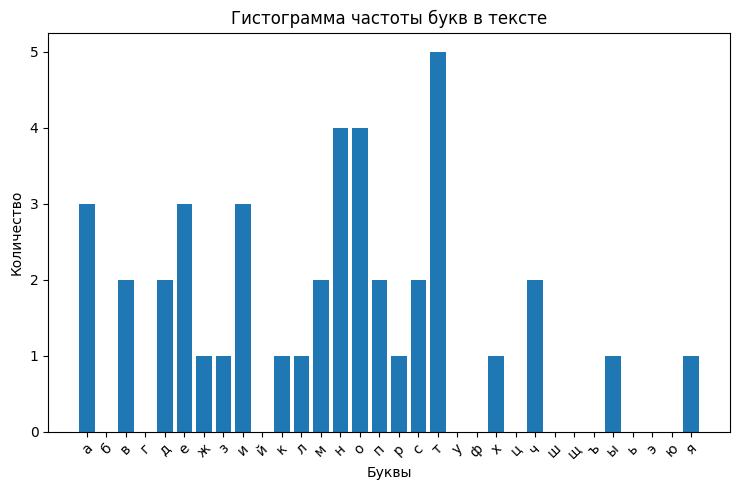

Зашифрованный текст


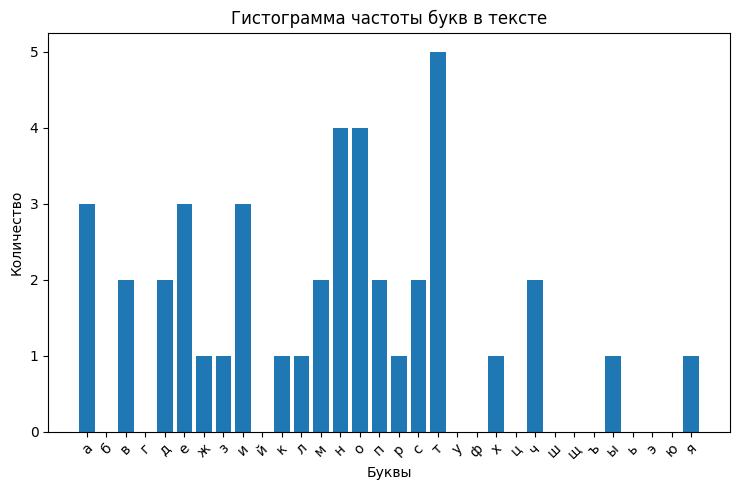

In [60]:
from utils.gist import plot_letter_count

print('Открытый текст')
plot_letter_count(open_text)
print('Зашифрованный текст')
plot_letter_count(encrypted_text)

Ввод строки для шифрования

In [81]:
open_text = input('Введите открытый текст для шифрования: ')
encrypted_text = vertical_swap(open_text, key=key)
print(encrypted_text)

['КРИПТОГ', 'РАФИЯ  ']
ТЯРАКРОИФГПИ


Ввод строки для расшифрования

In [82]:
encrypted_text = input('Введите текст для расшифрования: ')
decrypted_text = vertical_swap_decrypt(encrypted_text, key=key)
print(decrypted_text)

4
4
1
1
0
0
5
5
2
2
6
6
['К', 'Р', 'Ф', '', 'Т', 'О ', 'П ']
['Р', 'А', 'Г', '', 'Я', 'И ', 'И ']
КРФТО П РАГЯИ И 
